<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y=mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9457857142857143

In [30]:
pca.components_.shape

(784, 784)

In [42]:
pca.explained_variance_
# gives the n eigen vectors for n dimensional data

array([4.06329685e+01, 2.90131130e+01, 2.69184954e+01, 2.08204608e+01,
       1.81047848e+01, 1.57326502e+01, 1.37110164e+01, 1.25767117e+01,
       1.09673422e+01, 9.98327406e+00, 9.64372760e+00, 8.66448165e+00,
       8.02352594e+00, 7.86992108e+00, 7.38586112e+00, 7.14236306e+00,
       6.71482726e+00, 6.60258730e+00, 6.39395015e+00, 6.18539372e+00,
       5.88793733e+00, 5.73425833e+00, 5.49363001e+00, 5.33345357e+00,
       5.13514538e+00, 4.95219620e+00, 4.86142617e+00, 4.72608121e+00,
       4.52575460e+00, 4.38120182e+00, 4.30904070e+00, 4.22509567e+00,
       4.06353019e+00, 4.00356114e+00, 3.97287235e+00, 3.84791796e+00,
       3.76694887e+00, 3.72516569e+00, 3.67092606e+00, 3.46663279e+00,
       3.42539134e+00, 3.35279266e+00, 3.28098453e+00, 3.25424477e+00,
       3.20398211e+00, 3.15037877e+00, 3.13650937e+00, 3.08985897e+00,
       3.04834302e+00, 2.99534450e+00, 2.94679394e+00, 2.88416279e+00,
       2.86139985e+00, 2.82899038e+00, 2.79148406e+00, 2.68463820e+00,
      

In [43]:
pca.components_.shape

# shape of the unit vector U

(784, 784)

In [44]:
pca.explained_variance_ratio_

# contribution of each eigen vector of representing the data in the lower dimensions

array([5.67489426e-02, 4.05203840e-02, 3.75949926e-02, 2.90783366e-02,
       2.52855608e-02, 2.19725828e-02, 1.91491223e-02, 1.75649262e-02,
       1.53172435e-02, 1.39428712e-02, 1.34686528e-02, 1.21010153e-02,
       1.12058417e-02, 1.09913136e-02, 1.03152643e-02, 9.97518927e-03,
       9.37808290e-03, 9.22132597e-03, 8.92993851e-03, 8.63866379e-03,
       8.22322932e-03, 8.00859767e-03, 7.67253059e-03, 7.44882449e-03,
       7.17186269e-03, 6.91635163e-03, 6.78958010e-03, 6.60055422e-03,
       6.32077343e-03, 6.11888769e-03, 6.01810580e-03, 5.90086624e-03,
       5.67522015e-03, 5.59146598e-03, 5.54860532e-03, 5.37409113e-03,
       5.26100783e-03, 5.20265248e-03, 5.12690015e-03, 4.84157945e-03,
       4.78398069e-03, 4.68258769e-03, 4.58229880e-03, 4.54495343e-03,
       4.47475544e-03, 4.39989178e-03, 4.38052146e-03, 4.31536843e-03,
       4.25738630e-03, 4.18336733e-03, 4.11556050e-03, 4.02808839e-03,
       3.99629714e-03, 3.95103333e-03, 3.89865113e-03, 3.74942773e-03,
      

In [38]:
# use the cumulative sum and stop where the cumulative sum is 90 to get the best value of the n to be used
np.cumsum(pca.explained_variance_ratio_)

array([0.05674894, 0.09726933, 0.13486432, 0.16394266, 0.18922822,
       0.2112008 , 0.23034992, 0.24791485, 0.26323209, 0.27717496,
       0.29064362, 0.30274463, 0.31395047, 0.32494179, 0.33525705,
       0.34523224, 0.35461032, 0.36383165, 0.37276159, 0.38140025,
       0.38962348, 0.39763208, 0.40530461, 0.41275343, 0.4199253 ,
       0.42684165, 0.43363123, 0.44023178, 0.44655255, 0.45267144,
       0.45868955, 0.46459041, 0.47026563, 0.4758571 , 0.48140571,
       0.4867798 , 0.4920408 , 0.49724346, 0.50237036, 0.50721194,
       0.51199592, 0.51667851, 0.5212608 , 0.52580576, 0.53028051,
       0.5346804 , 0.53906093, 0.54337629, 0.54763368, 0.55181705,
       0.55593261, 0.5599607 , 0.56395699, 0.56790803, 0.57180668,
       0.57555611, 0.57927153, 0.58297237, 0.58659865, 0.59018836,
       0.59372061, 0.59720922, 0.60065098, 0.60407883, 0.6074625 ,
       0.61078319, 0.61407195, 0.61730706, 0.62049057, 0.62365472,
       0.62677964, 0.62988218, 0.6329545 , 0.63598082, 0.63897

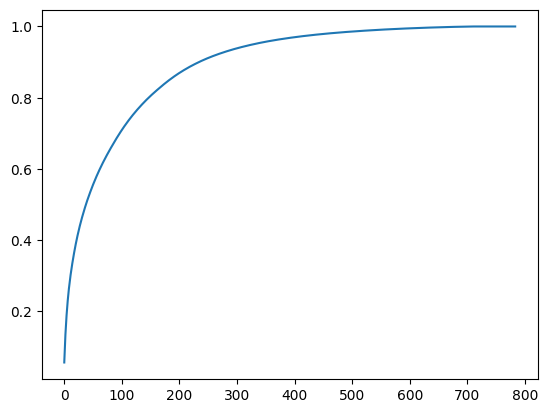

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# expained variance vs no. of components

In [49]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# index where cumulative variance >= 0.9
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1  # +1 because index starts at 0

print(f"Number of components to reach 90% variance: {n_components_90}")


Number of components to reach 90% variance: 235


KNN on the best features(235)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9457857142857143

## results:

all 728 columns : accuracy  = 0.9457857142857143

using only 235 columns : accuracy = 0.9457857142857143


hence using PCA is always betterrr !!
